In [1]:
from experiment import Experiment
from utils.behavior_data import BehaviorData
from visuals import Plotter
import torch
import numpy as np
from utils.state_data import StateData
import matplotlib.pyplot as plt

0	 [0.06555626541376114]
5	 [0.058853499591350555]
10	 [0.05370216816663742]
15	 [0.05391126871109009]
20	 [0.05258198454976082]
25	 [0.05122652277350426]
30	 [0.05012892931699753]
35	 [0.04894159361720085]
40	 [0.04773744195699692]
45	 [0.04651010408997536]
50	 [0.04522974044084549]
55	 [0.04396851360797882]
60	 [0.04271906986832619]
65	 [0.0416136234998703]
70	 [0.04047906771302223]
75	 [0.03934741020202637]
80	 [0.03819965943694115]
85	 [0.0371130034327507]
90	 [0.035971976816654205]
95	 [0.0348946787416935]
99	 [0.03407715633511543]
0	 [0.06555626541376114]
5	 [0.058853499591350555]
10	 [0.05370216816663742]
15	 [0.05254526808857918]
20	 [0.05139416456222534]
25	 [0.050065502524375916]
30	 [0.04882736876606941]
35	 [0.04751141741871834]
40	 [0.04613775759935379]
45	 [0.044755302369594574]
50	 [0.04337363690137863]
55	 [0.04196101427078247]
60	 [0.04054521024227142]
65	 [0.039287060499191284]
70	 [0.0380217470228672]
75	 [0.036759451031684875]
80	 [0.03549820929765701]
85	 [0.034272

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

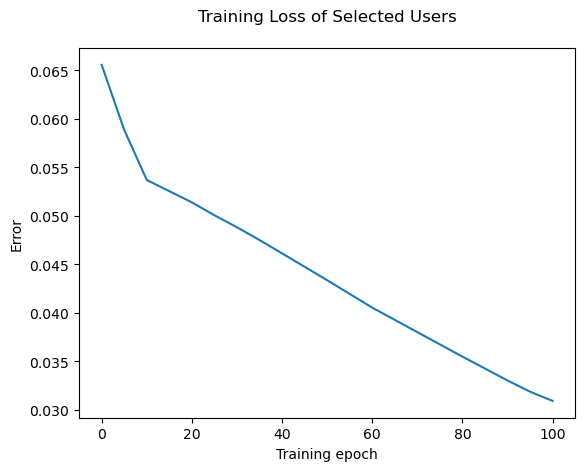

In [2]:
for respond_perc in [.5]:
# for respond_perc in [.75, .25]:
    # for estate, include_state in [(True, True)]:
    for estate, include_state, fullq in [(True, True, True), (True, False, False)]:
        for fulls, insertpreds in [(True, False), (True, True)]:
            for model, learning_rate, epochs in [("BasicNN", .0024, 60), ("LogisticRegressor", .003, 60)]:
            # for model, learning_rate, epochs in [("BasicNN", .0014, 100)]:
                # for loss_fn in ["MSELoss", "CrossEntropyLoss"]:
                for loss_fn in ["MSELoss"]:
                    test_metrics, train_metrics, adjusted_losses = [], [], []
                    for seed in range(3):
                        np.random.seed(seed)
                        torch.manual_seed(seed)
                        e = Experiment(
                            numValFolds = 5,
                            epochsToUpdateLabelMods = 10,
                            data_kw={"minw": 2,
                                    "maxw": 29,
                                    "include_state": include_state,
                                    "include_pid": False,
                                    "expanded_states": estate,
                                    "top_respond_perc": respond_perc,
                                     "full_questionnaire": fullq,
                                     "full_sequence": fulls,
                                     "insert_predictions": insertpreds
                                    },
                            model=model,
                            model_kw={
                                "lossfn": loss_fn,
                                # "lossfn": "NDCG",
                                # "lossfn": "CrossEntropyLoss",
                                "hidden_size": 200, 
                                "opt_kw": {
                                    "lr": learning_rate
                                }
                            },
                            train_kw={
                                "epochs": epochs,
                                "n_subj": 500,
                                "rec_every": 5,
                            })

                        report = e.run()



                        individual_test_scores, labels = e.report_scores_individual_test()
                        individual_train_scores, labels = e.report_scores_individual_train()



                        dire = "./experiment_output/"
                        fileprefix = f"{model}LR{learning_rate}Resp{respond_perc}States{int(include_state)}Expanded{int(estate)}Seq{int(fulls)}Pred{int(insertpreds)}"
                        np.savetxt(f"{dire}TRAINMETRICS-{fileprefix}S{seed}.csv", report["train_metrics"], delimiter = ',', header = ','.join(report['metric_labels']))
                        np.savetxt(f"{dire}TESTMETRICS-{fileprefix}S{seed}.csv", report["test_metrics"], delimiter = ',', header = ','.join(report['metric_labels']))
                        np.savetxt(f"{dire}IDVDTESTMETRICS-{fileprefix}S{seed}.csv", individual_test_scores, delimiter = ',', header = ','.join(report['metric_labels']))
                        np.savetxt(f"{dire}IDVDTRAINMETRICS-{fileprefix}S{seed}.csv", individual_train_scores, delimiter = ',', header = ','.join(report['metric_labels']))
                        np.savetxt(f"{dire}TRAINLOSSES-{fileprefix}S{seed}.csv", report["loss"], delimiter = ',')

                        preds1, preds2, preds3 = e.get_class_predictions(False)


                        np.savetxt(f"{dire}TRAINPREDS1-{fileprefix}S{seed}.csv", preds1, delimiter = ',')
                        np.savetxt(f"{dire}TRAINPREDS2-{fileprefix}S{seed}.csv", preds2, delimiter = ',')
                        np.savetxt(f"{dire}TRAINPREDS3-{fileprefix}S{seed}.csv", preds3, delimiter = ',')

                        plt.clf()
                        splot = plt.hist(preds1)
                        plt.title("Train Predictions for Class 1")
                        plt.savefig(f"{dire}/img/C1PredsTrain-{fileprefix}S{seed}.png")

                        plt.clf()
                        splot = plt.hist(preds2)
                        plt.title("Train Predictions for Class 2")
                        plt.savefig(f"{dire}/img/C2PredsTrain-{fileprefix}S{seed}.png")

                        plt.clf()
                        splot = plt.hist(preds3)
                        plt.title("Train Predictions for Class 3")
                        plt.savefig(f"{dire}/img/C3PredsTrain-{fileprefix}S{seed}.png")

                        preds1, preds2, preds3 = e.get_class_predictions(True)

                        np.savetxt(f"{dire}TESTPREDS1-{fileprefix}S{seed}.csv", preds1, delimiter = ',')
                        np.savetxt(f"{dire}TESTPREDS2-{fileprefix}S{seed}.csv", preds2, delimiter = ',')
                        np.savetxt(f"{dire}TESTPREDS3-{fileprefix}S{seed}.csv", preds3, delimiter = ',')

                        plt.clf()
                        splot = plt.hist(preds1)
                        plt.title("Test Predictions for Class 1")
                        plt.savefig(f"{dire}/img/C1PredsTest-{fileprefix}S{seed}.png")

                        plt.clf()
                        splot = plt.hist(preds2)
                        plt.title("Test Predictions for Class 2")
                        plt.savefig(f"{dire}/img/C2PredsTest-{fileprefix}S{seed}.png")

                        plt.clf()
                        splot = plt.hist(preds3)
                        plt.title("Test Predictions for Class 3")
                        plt.savefig(f"{dire}/img/C3PredsTest-{fileprefix}S{seed}.png")


                        plt.clf()
                        splot = plt.scatter(individual_test_scores[:, -1], individual_test_scores[:, labels.index("Acc")])
                        plt.title("Test Accuracy vs Response Count")
                        plt.savefig(f"{dire}/img/TestACCvResponse-{fileprefix}S{seed}.png")
                        plt.clf()
                        splot = plt.scatter(individual_train_scores[:, -1], individual_train_scores[:, labels.index("Acc")])
                        plt.title("Train Accuracy vs Response Count")
                        plt.savefig(f"{dire}/img/TrainACCvResponse-{fileprefix}S{seed}.png")
                        plt.clf()


                        writer = open(f"{dire}ALOSS-{fileprefix}.csv", "a")
                        writer.write(",".join([str(loss[0]) for loss in report["loss"]]))
                        writer.write("\n")
                        writer.close()

                        writer = open(f"{dire}FINALTRAINMETRICS-{fileprefix}.csv", "a")
                        writer.write(",".join([str(loss) for loss in report["train_metrics"][-1, :]]))
                        writer.write("\n")
                        writer.close()

                        writer = open(f"{dire}FINALTESTMETRICS-{fileprefix}.csv", "a")
                        writer.write(",".join([str(loss) for loss in report["test_metrics"][-1, :]]))
                        writer.write("\n")
                        writer.close()

                        Plotter.training_loss(report, dire)



In [3]:
labels.index("Acc")

4